# Introduction


The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).


# Objective:

* To reduce the losses for the company caused by clients who might not pay back their debts.
* To achieve a high recall rate to correctly identify as many clients as possible who are at risk of not paying their debts.

## Understanding the Home loan Equaity System

### Home Equity loan:
The home equity loan system involves using the equity built in a home as collateral to obtain a loan.'LOAN' column signifies the approved loan amount, which is often based on the available equity in the property.'MORTDUE' column represents the outstanding mortgage due, reflecting the remaining balance on the original home loan.'VALUE' column indicates the appraised value of the property, serving as a key factor in determining available equity.By analyzing 'LOAN', 'MORTDUE', and 'VALUE', we can understand how home equity loans allow homeowners to leverage their property's value.

### Understanding Defaulters:

A 'defaulter' is an individual who fails to meet the agreed-upon terms of a loan, resulting in missed payments or total non-payment.The 'BAD' column indicates whether a borrower is a defaulter (1) or not (0).Evaluating the distribution of 'BAD' values helps us assess the prevalence of borrowers who have defaulted on their home equity loans.





# Importing packages and loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import classification_report

# Validating the algorithm using various Performance metrics
from sklearn.metrics import  f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import itertools
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install graphviz

from scipy.stats import boxcox


In [3]:
df = pd.read_csv("D:\\Home Loan\\hmeq.csv")

In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Data Exploration


In [6]:
# Size of DataFrame
df.shape

(5960, 13)

In [7]:
# Displaying summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* The dataset contains a total of 5960 entries (rows) and 13 columns (features).
* The columns represent various attributes related to loans, credit history, and client information.
###  Target Variable:

* The "BAD" column is the target variable, indicating whether a client defaulted (1) or did not default (0) on their loan payment.
###  Numeric Features:

* The dataset includes 9 numeric features.
"LOAN," "MORTDUE," "VALUE," "YOJ," "DEROG," "DELINQ," "CLAGE," "NINQ," "CLNO," and "DEBTINC" are numeric columns.
### Categorical Features:

* The dataset also includes 2 categorical features.
"REASON" represents the reason for the loan, and "JOB" represents the job type of the client.
###  Missing Values:

Several columns have missing values:
"MORTDUE," "VALUE," "REASON," "JOB," "YOJ," "DEROG," "DELINQ," "CLAGE," "NINQ," "CLNO," and "DEBTINC."
Missing values in these columns need to be addressed for accurate analysis and modeling.
###  Data Types:

Most columns are of 'float64' data type, representing continuous numeric values.
"BAD" and "LOAN" are of int64 data type.
"REASON" and "JOB" are of 'object' data type, indicating categorical values.
###  Data Summary:

The "BAD" column has a balanced distribution of classes, with a mean default rate of approximately 19.95%.
The "LOAN" column represents loan amounts, with a mean loan amount of around 18,608.
The "MORTDUE," "VALUE," and "DEBTINC" columns have missing values that need to be handled.
The "REASON" column indicates reasons for loans, with "DebtCon" being the most common reason.
The "JOB" column represents various job types, with "Other" being the most common job type.
The "YOJ," "DEROG," "DELINQ," "CLAGE," "NINQ," and "CLNO" columns have varying levels of missing data.
Data Variation:

The numeric columns show variations in range and distribution.
"VALUE" has a wider range compared to "MORTDUE," indicating potential property value variations.
"CLAGE" represents the age of the oldest trade line, showing variability over time.
"DEBTINC" represents the debt-to-income ratio and has a wide distribution.

In [8]:
df.describe(include = 'all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


* BAD: The "BAD" column represents whether a client defaulted (1) or did not default (0) on their loan payment. The mean default rate is approximately 19.95%.

* LOAN: The "LOAN" column represents the loan amount requested by the client. The mean loan amount is approximately 18,608 with a wide range of values. The highest loan amount is approximately 89,900.

* MORTDUE: The "MORTDUE" column represents the amount of the existing mortgage due for the property. There are missing values in this column. The mean mortgage due is approximately 73,761.

* VALUE: The "VALUE" column represents the value of the property. The mean property value is approximately 101,776, with a wide range of values. The highest property value is 855,909.

* REASON: The "REASON" column represents the reason for the loan, with two unique values: "DebtCon" (Debt Consolidation) and "HomeImp" (Home Improvement). The most common reason for the loan is debt consolidation (DebtCon).

* JOB: The "JOB" column represents the job type of the client. There are six unique job types, with "Other" being the most common job type.

* YOJ: The "YOJ" column represents the number of years in the job for the client. The mean years in the job is approximately 8.92 years.

* DEROG: The "DEROG" column represents the number of major derogatory reports on the client's credit history. The mean number of derogatory reports is approximately 0.25.

* DELINQ: The "DELINQ" column represents the number of delinquent credit lines on the client's credit history. The mean number of delinquent credit lines is approximately 0.45.

* CLAGE: The "CLAGE" column represents the age of the oldest trade line in months. The mean age of the oldest trade line is approximately 179.77 months.

* NINQ: The "NINQ" column represents the number of recent credit lines on the client's credit history. The mean number of recent credit lines is approximately 1.19.

* CLNO: The "CLNO" column represents the number of credit lines on the client's credit history. The mean number of credit lines is approximately 21.30.

* DEBTINC: The "DEBTINC" column represents the debt-to-income ratio for the client. The mean debt-to-income ratio is approximately 33.78.

### Exploring Data Analysis(EDA)



The percentage of defaulters in the data is 19.949664429530202 %


[]

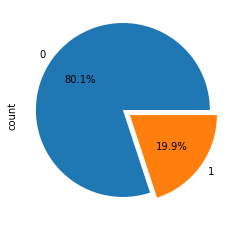

In [9]:
# How many defaulters
perc_default = df.BAD.sum() / len(df.BAD)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
df['BAD'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

### Categorical Columns

REASON
           Value  Count  Percentage
REASON                             
DebtCon  DebtCon   3928   65.906040
HomeImp  HomeImp   1780   29.865772
--------------------------


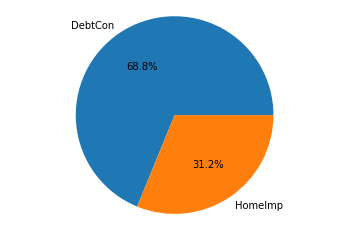

JOB
           Value  Count  Percentage
JOB                                
Mgr          Mgr    767   12.869128
Office    Office    948   15.906040
Other      Other   2388   40.067114
ProfExe  ProfExe   1276   21.409396
Sales      Sales    109    1.828859
Self        Self    193    3.238255
--------------------------


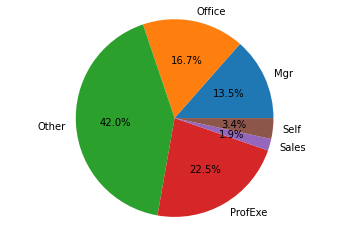

In [10]:
def show_value_counts(col):
    print(col)
    value_counts = df[col].value_counts()
    percentage = value_counts / len(df) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)
    
    
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()
    

show_value_counts('REASON')
show_value_counts('JOB')

### Demonstration of the distribution of above pie plots.
* Approximately 20% of the clients in the dataset have defaulted on their loans (BAD=1).
* Around 80% of the clients have successfully repaid their loans or have not defaulted (BAD=0).

* Majority of clients (around 69.8%) have taken out loans for debt consolidation (DebtCon), indicating a higher frequency.
* Smaller portion of clients (around 30.2%) have taken out loans for home improvement purposes (HomeImp).

* Largest job category is "Other," accounting for around 42.1% of the clients. This category likely includes diverse job roles not covered by the specific categories.
* Next most common job category is "ProfExe" (Professional/Executive), representing approximately 21.4% of the clients.
* "Office" job category constitutes around 15.8% of clients.
* "Mgr" (Manager), "Self" (Self-Employed), and "Sales" job categories have relatively smaller representations, with approximately 12.9%, 3.2%, and 1.8% of clients, respectively.


C:\Users\HP\AppData\Local\Temp\ipykernel_16368\4294767088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "BAD", data = df, palette = 'rocket', errorbar = None)
C:\Users\HP\AppData\Local\Temp\ipykernel_16368\4294767088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "BAD", data = df, palette = 'rocket', errorbar = None)
C:\Users\HP\AppData\Local\Temp\ipykernel_16368\4294767088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "BAD", data = df, palette = 'rocket', errorbar = None

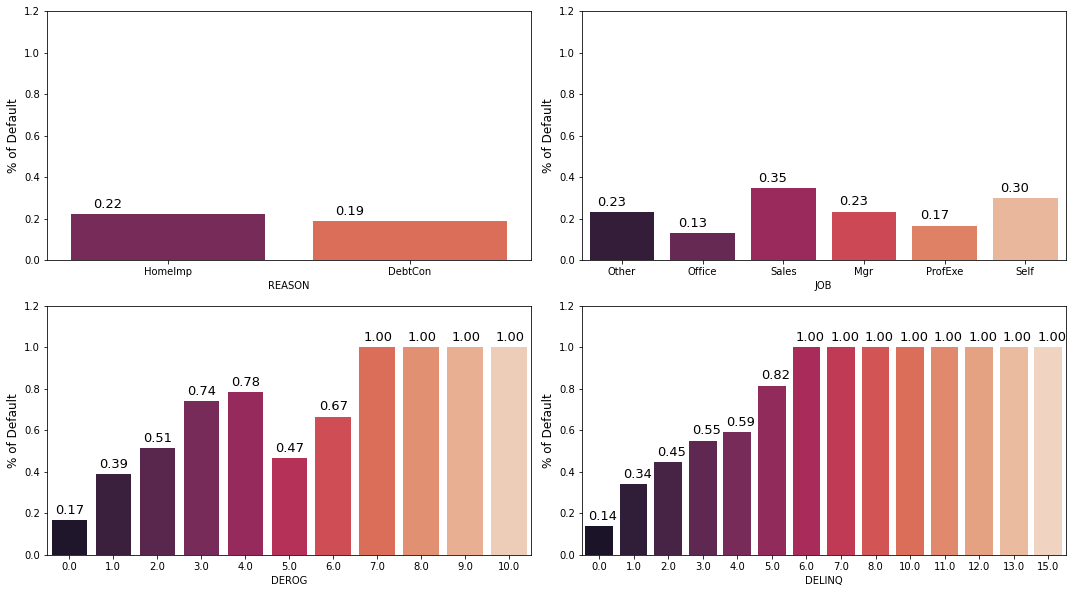

In [12]:
pay_x_fts = ['REASON','JOB','DEROG','DELINQ']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "BAD", data = df, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

* Those who have office job have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn't have a office job.

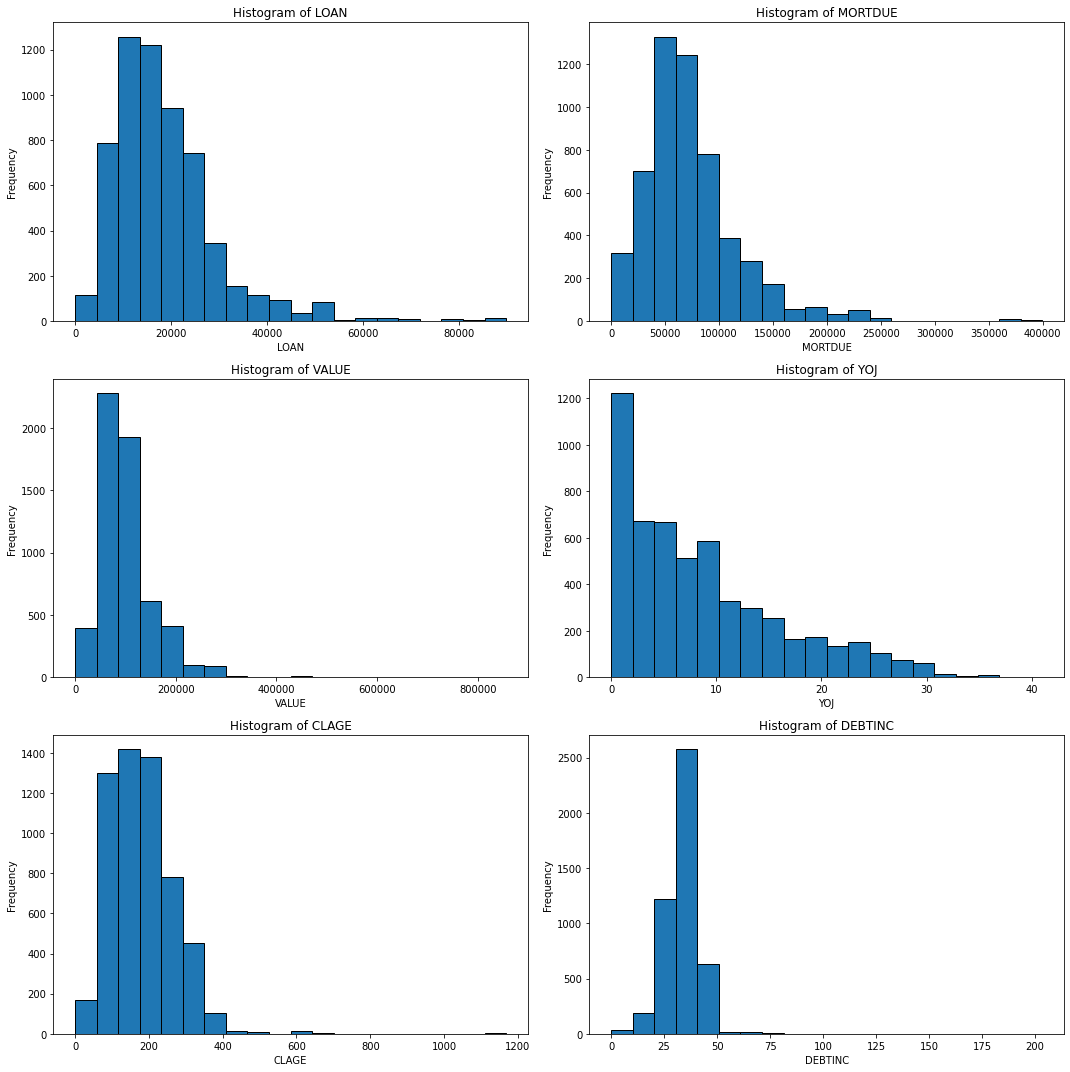

In [13]:
num_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC']
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column and create histograms
for idx, column in enumerate(num_columns):
    ax = axes[idx]

    # Plot histogram with adjusted bins and range
    ax.hist(df[column].dropna(), bins=20, range=(0, df[column].max()), edgecolor='black')

    # Adding labels and title for each subplot
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

    # Remove grid lines
    ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


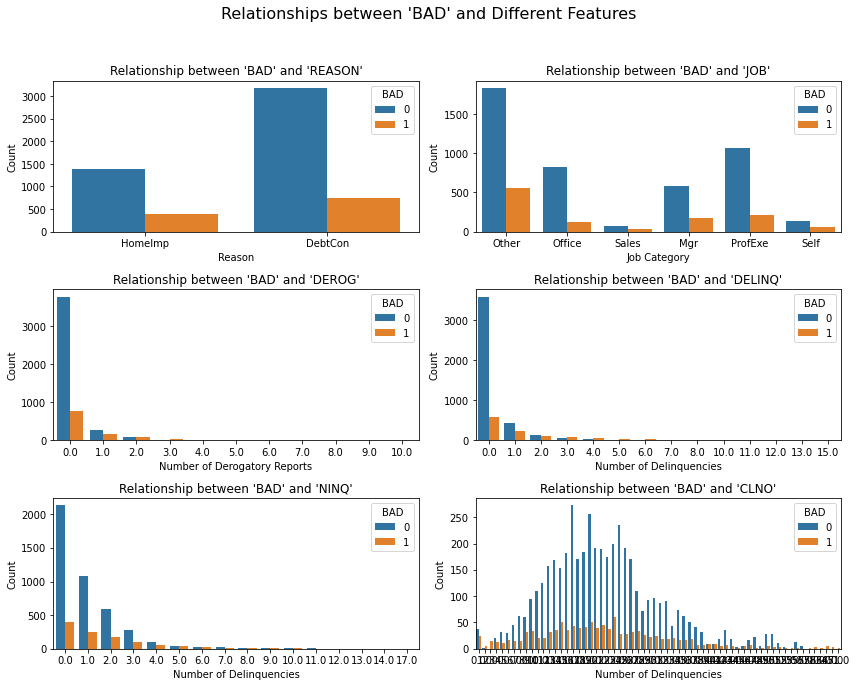

In [14]:

# Create subplots for bar plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Relationships between 'BAD' and Different Features", fontsize=16)

# Bar plot for 'REASON'
sns.countplot(x='REASON', hue='BAD', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Relationship between 'BAD' and 'REASON'")
axes[0, 0].set_xlabel('Reason')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='BAD')

# Bar plot for 'JOB'
sns.countplot(x='JOB', hue='BAD', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Relationship between 'BAD' and 'JOB'")
axes[0, 1].set_xlabel('Job Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='BAD')

# Bar plot for 'DEROG'
sns.countplot(x='DEROG', hue='BAD', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Relationship between 'BAD' and 'DEROG'")
axes[1, 0].set_xlabel('Number of Derogatory Reports')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='BAD')

# Bar plot for 'DELINQ'
sns.countplot(x='DELINQ', hue='BAD', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Relationship between 'BAD' and 'DELINQ'")
axes[1, 1].set_xlabel('Number of Delinquencies')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='BAD')

# Bar plot for 'NINQ'
sns.countplot(x='NINQ', hue='BAD', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Relationship between 'BAD' and 'NINQ'")
axes[2, 0].set_xlabel('Number of Delinquencies')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='BAD')

# Bar plot for 'CLNO'
sns.countplot(x='CLNO', hue='BAD', data=df, ax=axes[2, 1])
axes[2, 1].set_title("Relationship between 'BAD' and 'CLNO'")
axes[2, 1].set_xlabel('Number of Delinquencies')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='BAD')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


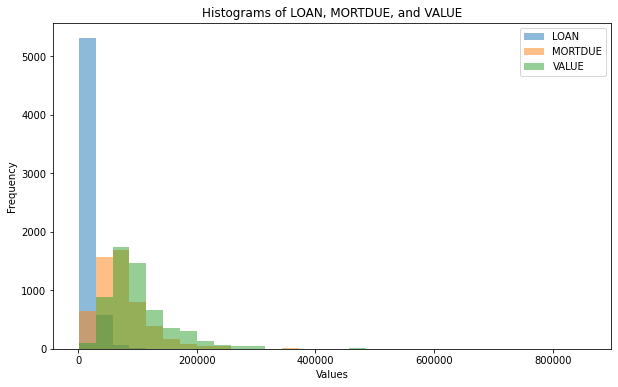

In [15]:


# Select the columns for plotting
columns_to_plot = ['LOAN', 'MORTDUE', 'VALUE']

# Plot histograms for multiple columns
df[columns_to_plot].plot(kind='hist', bins=30, alpha=0.5, figsize=(10, 6))
plt.title('Histograms of LOAN, MORTDUE, and VALUE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* The majority of individuals have requested loans in the range of 0 to 20,000. Interestingly, this trend is more pronounced in the case of loan amounts compared to the amounts due on existing mortgages (MORTDUE) and the property values (VALUE).

In [16]:
# Count the number of missing values in each column
df.isnull().sum()/len(df)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

* 'BAD' and 'LOAN' columns have no missing values, which means all the entries are present in these columns.
* 'DEBTINC' has the highest percentage of missing values, approximately 21.26%. This suggests that a substantial portion of the data is missing for this feature.
* 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', and 'VALUE' columns have relatively higher percentages of missing values, ranging from around 8.69% to 11.88%.
* 'REASON', 'JOB', 'CLAGE', and 'CLNO' columns have moderate percentages of missing values, ranging from approximately 3.72% to 5.17%.
* The percentage of missing values can give an idea of the data quality and potential challenges in modeling. Columns with high percentages of missing values might require careful handling during preprocessing.
* Strategies like data imputation (for numerical columns) or creating a separate category for missing values (for categorical columns) can be considered to address missing data.
* Understanding the distribution of missing values is essential for accurate analysis and modeling, as it can influence the results and conclusions drawn from the data.

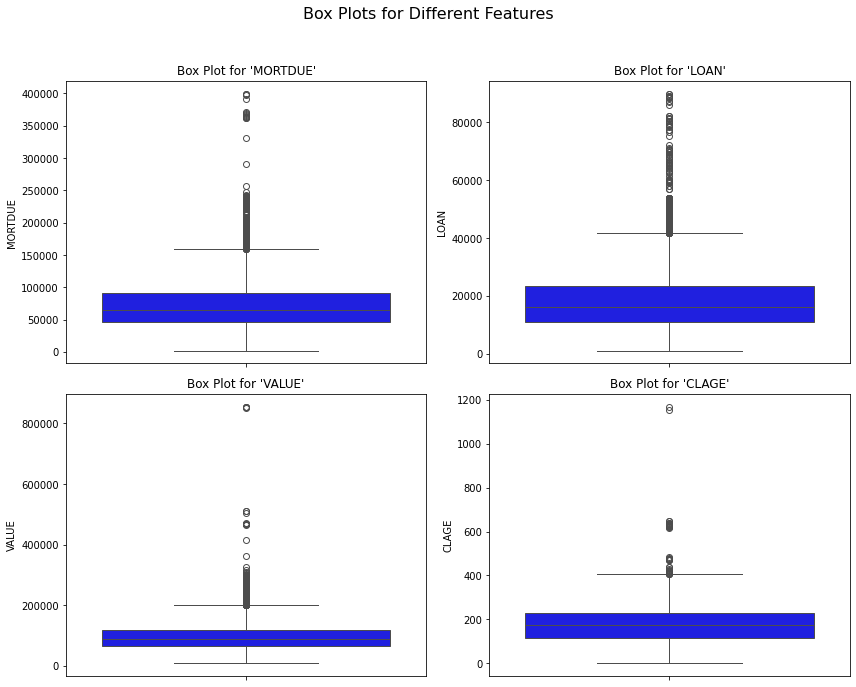

In [17]:

# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Box Plots for Different Features", fontsize=16)

# Box plot for 'MORTDUE'
sns.boxplot(y='MORTDUE',  data=df, ax=axes[0, 0],color = 'blue')
axes[0, 0].set_title("Box Plot for 'MORTDUE'")

# Box plot for 'LOAN'
sns.boxplot(y='LOAN',  data=df, ax=axes[0, 1],color = 'blue')
axes[0, 1].set_title("Box Plot for 'LOAN'")

# Box plot for 'VALUE'
sns.boxplot(y='VALUE',  data=df, ax=axes[1, 0],color = 'blue')
axes[1, 0].set_title("Box Plot for 'VALUE'")



# Box plot for 'DELINQ'
sns.boxplot(y='CLAGE',  data=df, ax=axes[1, 1],color = 'blue')
axes[1, 1].set_title("Box Plot for 'CLAGE'")


# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Creating a Copy of the DataFrame: Preserving Data Integrity and Exploratory Analysis

In [18]:
# Create a copy of the original dataset
df_copy = df.copy()


###  Handling Null Value in Dataset

In [19]:
# Drop rows with null values in all specified columns
columns_to_check = ['VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = df_copy.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5958, 13)

In [20]:
# Drop rows with null values in all specified columns
columns_to_check = ['VALUE', 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5957, 13)

In [21]:
# Drop rows with null values in all specified columns
columns_to_check = ['VALUE', 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', ]
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5950, 13)

In [22]:
# Drop rows with null values in all specified columns
columns_to_check = [ 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5940, 13)

In [23]:
# Drop rows with null values in all specified columns
columns_to_check = [ 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5875, 13)

In [24]:
# Drop rows with null values in all specified columns
columns_to_check = ['MORTDUE', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5873, 13)

In [25]:
# Drop rows with null values in all specified columns
columns_to_check = ['MORTDUE', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5867, 13)

In [26]:
# Drop rows with null values in all specified columns
columns_to_check = [ 'JOB', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = data_cleaned.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5862, 13)

In [27]:
# Percentage of each feature having the number of missing values in each column
data_cleaned.isnull().sum()/len(df)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     7.684564
VALUE       1.711409
REASON      2.802013
JOB         3.036913
YOJ         7.080537
DEROG      10.234899
DELINQ      8.087248
CLAGE       3.523490
NINQ        6.912752
CLNO        2.080537
DEBTINC    20.922819
dtype: float64

### Assessing Skewness in Dataset: Exploring Data Distribution

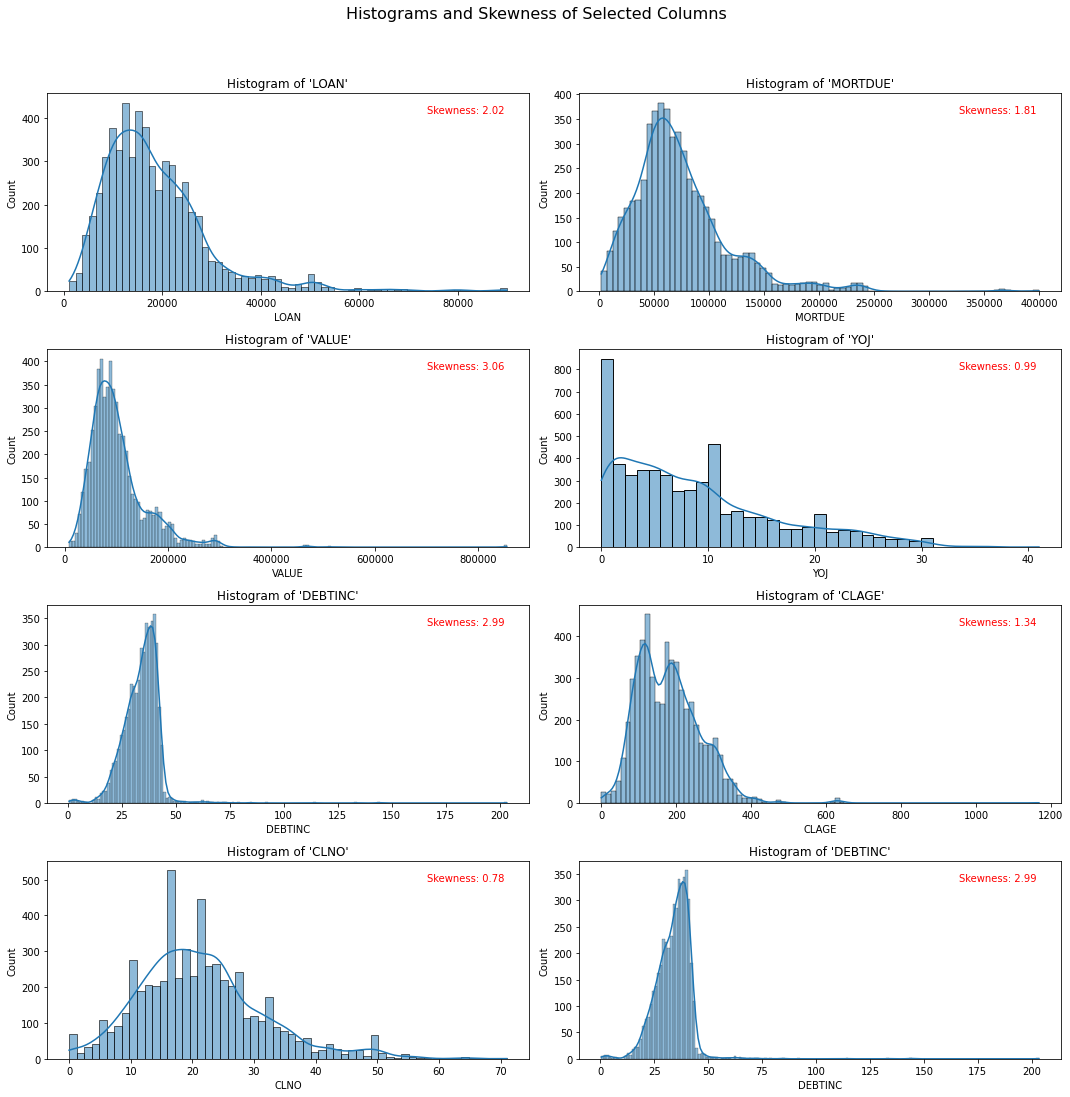

In [28]:

# Select the columns to check for skewness
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ',  'DEBTINC', 'CLAGE', 'CLNO', 'DEBTINC']

# Create subplots for histograms
num_columns = len(columns_to_check)
num_rows = (num_columns + 1) // 2  # Calculate the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
fig.suptitle("Histograms and Skewness of Selected Columns", fontsize=16)

for idx, column in enumerate(columns_to_check):
    row_idx = idx // 2
    col_idx = idx % 2

    # Plot histogram
    sns.histplot(data_cleaned[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(f"Histogram of '{column}'")

    # Calculate skewness
    skew_value = data_cleaned[column].skew()
    axes[row_idx, col_idx].text(0.95, 0.9, f"Skewness: {skew_value:.2f}", transform=axes[row_idx, col_idx].transAxes,
                                horizontalalignment='right', fontsize=10, color='red')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- LOAN (Skewness: 2.02): The 'LOAN' column appears to be right-skewed.
- MORTDUE (Skewness: 1.81): The 'MORTDUE' column is right-skewed
- VALUE (Skewness: 3.06): The 'VALUE' column is highly right-skewed
- CLAGE (Skewness: 1.34): The 'CLAGE' column is right-skewed
- DEBTINC (Skewness: 2.99): The 'DEBTINC' column is highly right-skewed


In [29]:
# columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC', 'CLAGE', 'CLNO', 'DEBTINC']

# Calculate skewness for each column
skewness = data_cleaned[columns_to_check].skew()

# Print the skewness values
print(skewness)

LOAN       2.023170
MORTDUE    1.814242
VALUE      3.055360
YOJ        0.989246
DEBTINC    2.988017
CLAGE      1.343412
CLNO       0.775052
DEBTINC    2.988017
dtype: float64


### Correlation


In [32]:
# Create a figure and plot the heatmap
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(df.corr(), annot=True, cmap="viridis")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

ValueError: could not convert string to float: 'HomeImp'

<Figure size 1440x1440 with 0 Axes>

In [33]:
df35 = data_cleaned.copy()

In [34]:

# List of categorical columns with missing values
categorical_columns_with_missing = ['REASON', 'JOB']

# Fill missing values with the most frequent category (mode)
df35['REASON'] = df35['REASON'].fillna('Other reason')
df35['JOB'].fillna(df35['JOB'].mode()[0], inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_16368\1504952692.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df35['JOB'].fillna(df35['JOB'].mode()[0], inplace=True)


### Imputing the input variables

REASON - This shows the reason why the person is taking the loan. There are two available values : Debt consolidation and Home Improvement. The missing value must be showing that the Reason of taking the loan was not either of the two given optins and hence was left empty. So, filling the missing values with a new value "Other reason", for this attribute.

JOB - This tells the occupation of the applicant. There are 6 unique values for this attribute, and the value "Other" is the most frequent. The "Other" value is already present, so it rules out the reasoning used above. Out of the remaining options, we can replace the missing values with the most frequent value for simplicity

# Imputing Missing Values with IterativeImputer: Enhancing Data Completeness






In [35]:
# Creating copy of cleaned data
df1 = data_cleaned.copy()
df1.drop(columns=['REASON','JOB'], inplace=True)


# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the DataFrame
imputed_data = imputer.fit_transform(df1)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_data, columns=df1.columns)

# Display the DataFrame after imputation
print("\nDataFrame after imputation:\n", df_imputed)



DataFrame after imputation:
       BAD     LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0     1.0   1100.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   
1     1.0   1300.0  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0   
2     1.0   1500.0  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0   
3     0.0   1700.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0   
4     1.0   1700.0  30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   
...   ...      ...      ...       ...   ...    ...     ...         ...   ...   
5857  0.0  88900.0  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0   
5858  0.0  89000.0  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0   
5859  0.0  89200.0  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0   
5860  0.0  89800.0  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0   
5861  0.0  89900.0  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0   

      CLN

C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [36]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5862 non-null   float64
 1   LOAN     5862 non-null   float64
 2   MORTDUE  5862 non-null   float64
 3   VALUE    5862 non-null   float64
 4   YOJ      5862 non-null   float64
 5   DEROG    5862 non-null   float64
 6   DELINQ   5862 non-null   float64
 7   CLAGE    5862 non-null   float64
 8   NINQ     5862 non-null   float64
 9   CLNO     5862 non-null   float64
 10  DEBTINC  5862 non-null   float64
dtypes: float64(11)
memory usage: 503.9 KB


In [37]:
# Convert the specified columns to integer type
df_imputed[df_imputed.columns] = df_imputed[df_imputed.columns].astype(int)

In [38]:

# Specify the index where you want to insert the columns from data2 into data1
index_to_insert = 4  # Replace with the desired index

# Select the columns from data2 that you want to add to data1
columns_to_insert = ['REASON', 'JOB']  # Replace with your column names

# Use iloc to select the columns from data2
columns_to_insert_values = df35[columns_to_insert].values

# Insert the columns from data2 into data1 at the specified index
for idx, column_name in enumerate(columns_to_insert):
    df_imputed.insert(index_to_insert + idx, column_name, columns_to_insert_values[:, idx])


In [39]:
df_imputed.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [40]:
pd.crosstab(df_imputed.REASON, df.BAD).style.background_gradient(cmap='summer_r')

BAD,0,1
REASON,,
DebtCon,3190,733
HomeImp,1360,412
Other reason,137,30


In [41]:
pd.crosstab(df_imputed.JOB, df.BAD).style.background_gradient(cmap='summer_r')

BAD,0,1
JOB,,
Mgr,612,155
Office,763,185
Other,2057,512
ProfExe,1022,254
Sales,82,27
Self,151,42


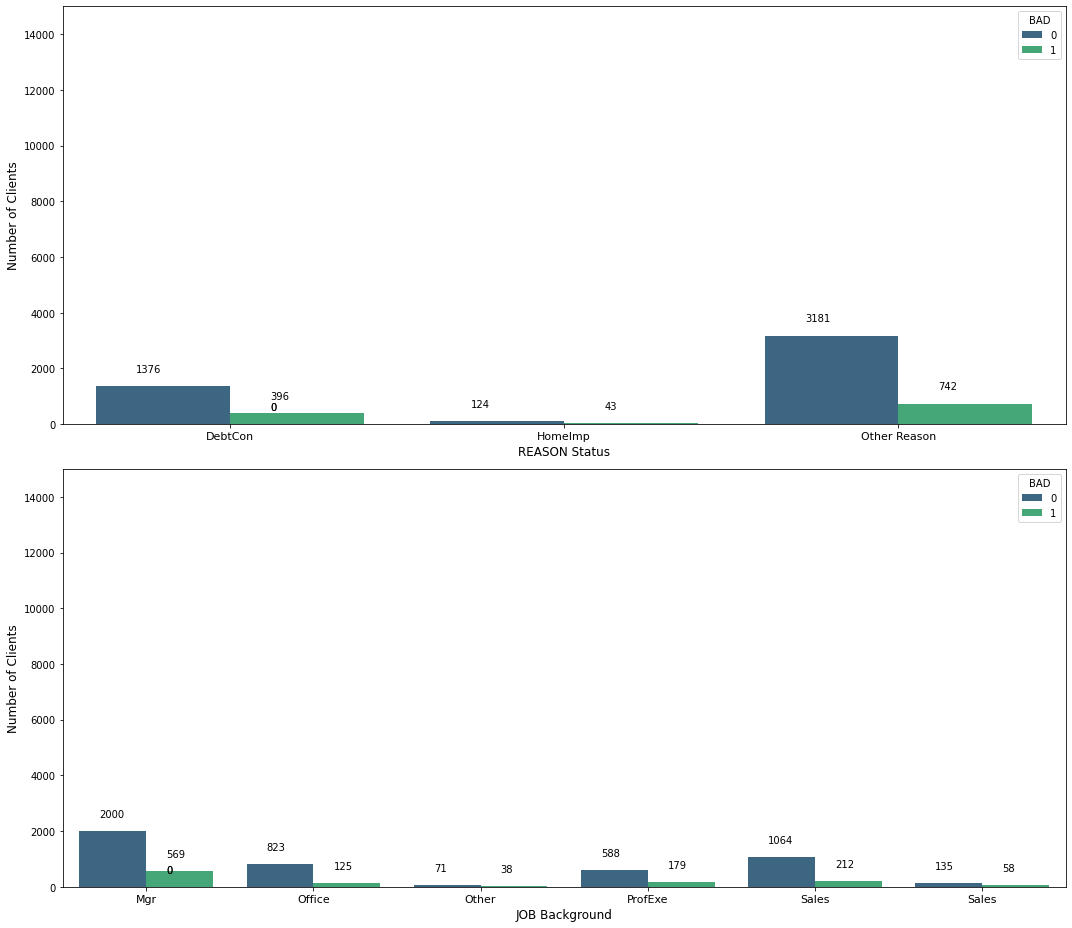

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 13))

# Count plot for MARRIAGE
ax1 = sns.countplot(data=df_imputed, x='REASON', hue='BAD', palette='viridis', ax=axes[0])
ax1.set_xlabel("REASON Status", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 15000)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['DebtCon', 'HomeImp', 'Other Reason'], fontsize=11)
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for EDUCATION
ax2 = sns.countplot(data=df_imputed, x='JOB', hue='BAD', palette='viridis', ax=axes[1])
ax2.set_xlabel("JOB Background", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 15000)
ax2.set_xticks([0, 1, 2, 3,4,5])
ax2.set_xticklabels(['Mgr', 'Office', 'Other', 'ProfExe','Sales','Sales'], fontsize=11)
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))


plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16368\2415460663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="REASON", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,
C:\Users\HP\AppData\Local\Temp\ipykernel_16368\2415460663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="JOB", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,


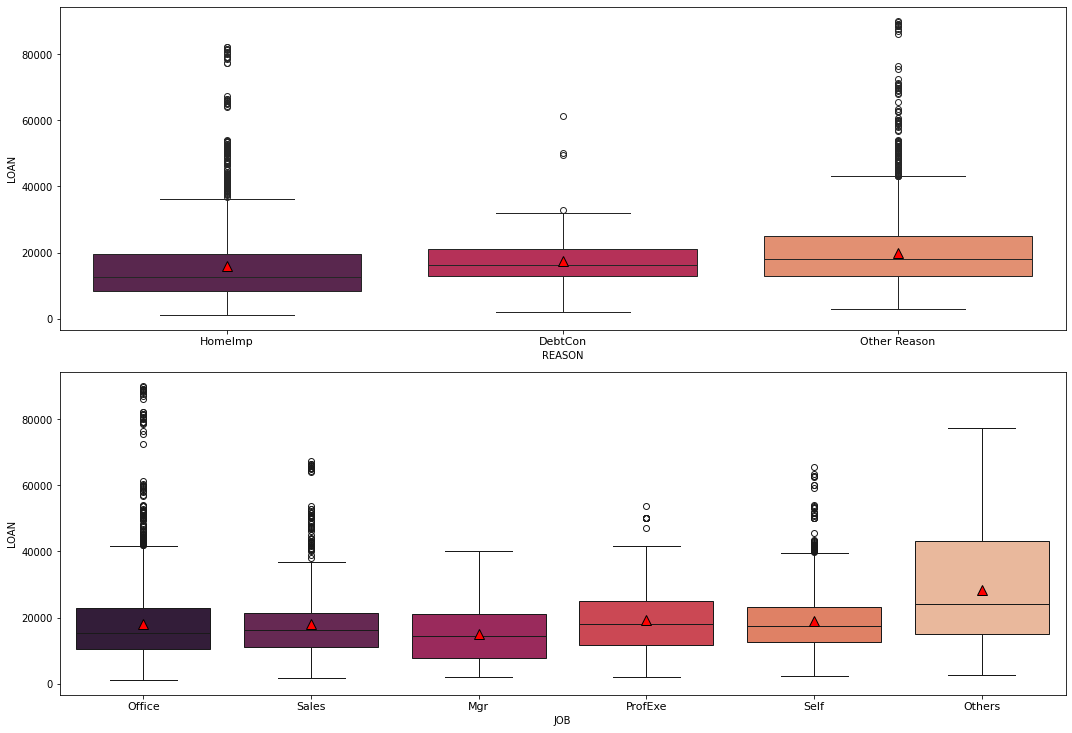

In [43]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.boxplot(x="REASON", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['HomeImp', 'DebtCon', 'Other Reason'], fontsize=11)


plt.subplot(4, 1, 2)
sns.boxplot(x="JOB", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3,4,5], ['Office', 'Sales', 'Mgr','ProfExe','Self', 'Others'], fontsize=11)


plt.tight_layout()
plt.show()

In [44]:
df_imputed.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860,39025,HomeImp,Other,10,0,0,94,1,9,36
1,1,1300,70053,68400,HomeImp,Other,7,0,2,121,0,14,37
2,1,1500,13500,16700,HomeImp,Other,4,0,0,149,1,10,36
3,0,1700,97800,112000,HomeImp,Office,3,0,0,93,0,14,32
4,1,1700,30548,40320,HomeImp,Other,9,0,0,101,1,8,37


- Applying the basic Classification on the data after replacement/imputation.Lets check the performnace by applying both Logistic Regression and Decision tree algorithms.
- Before applying the algorithms, The data is split into training and testing sets in the ratio 4:1 that is test data 20% and train data 80%.
- And also taking all the columns except JOB,REASON as input features(as they are nominal features, they must be transformed to other variables to be usable which is taken care of in next section).

In [45]:
df_imputed.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860,39025,HomeImp,Other,10,0,0,94,1,9,36
1,1,1300,70053,68400,HomeImp,Other,7,0,2,121,0,14,37
2,1,1500,13500,16700,HomeImp,Other,4,0,0,149,1,10,36
3,0,1700,97800,112000,HomeImp,Office,3,0,0,93,0,14,32
4,1,1700,30548,40320,HomeImp,Other,9,0,0,101,1,8,37


### Feature transformation

In [46]:
def plotconfusionmatrix(y, y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

def model_analysis(model,x_test, y_true,y_pred):
    
    plotconfusionmatrix(y_true, y_pred)
    print(classification_report(y_test, y_pred))



The most widely used evaluation metric for measuring the accuracy of a classification prediction is the ROC(Receiver Operating Characteristics). ROC Curve is formed by plotting TP rate(Sensitivity) and FP rate(Specificity). The larger the area under ROC curve, higher will be the accuracy. Area under the curve (AUC).

Accuracy: (TP + TN) / (TP + TN + FP + FN)

Error Rate: 1 - Accuracy = (FP + FN) / (TP + TN + FP + FN)

Specificity: TN / (TN + FP)

Precision: TP / (TP + FP)

Recall(Sensitivity): TP / (TP + FN)



In [48]:
# Capping off the features CLAGE(values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)

df_imputed.loc[df["CLAGE"]>=600,"CLAGE"] = 600
df_imputed.loc[df["VALUE"]>=400000,"VALUE"] = 400000
df_imputed.loc[df["MORTDUE"]>=300000,"MORTDUE"] = 300000
df_imputed.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

In [49]:
# Creating new binary vaiables B_DEROG,B_DELINQ from DEROG,DELINQ

df_imputed["B_DEROG"] = (df_imputed["DEROG"]>=1)*1
df_imputed["B_DELINQ"] = (df_imputed["DELINQ"]>=1)*1

# one-hot encoding to convert categorical variables into binary vectors

REASON and JOB are categorical attributes and of string type. Some plots work only with numerical values, so we need to convert them to numericals. Using Label Encoding on these two variables to convert them to numerical values. (We can also use One-Hot-Encoding)

In [50]:

# Specify the columns for one-hot encoding
columns_to_encode = ['JOB', 'REASON']

# Perform one-hot encoding
df_imputed = pd.get_dummies(df_imputed, columns=columns_to_encode, drop_first=True)

# Now 'encoded_data' contains the one-hot encoded features with dropped columns for multicollinearity


In [51]:
df_imputed.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,B_DEROG,B_DELINQ,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,REASON_Other reason
0,1,1100,25860,39025,10,0,0,94,1,9,36,0,0,False,True,False,False,False,True,False
1,1,1300,70053,68400,7,0,2,121,0,14,37,0,1,False,True,False,False,False,True,False
2,1,1500,13500,16700,4,0,0,149,1,10,36,0,0,False,True,False,False,False,True,False
3,0,1700,97800,112000,3,0,0,93,0,14,32,0,0,True,False,False,False,False,True,False
4,1,1700,30548,40320,9,0,0,101,1,8,37,0,0,False,True,False,False,False,True,False


All the attributes are of numerical type,now, we can use plots to understand the distribution of all the the attributes.
Plotting Boxplots for each attribute in df

# Data Cleaning and Transformation

In [52]:

data = df_imputed.copy()

# List of columns with high skewness
high_skew_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLNO', 'DEBTINC']

# Apply appropriate transformations to decrease skewness
for column in high_skew_columns:
    if column == 'CLAGE'  or column == 'MORTDUE' :
        data[column] = np.log1p(data[column])  # Apply log transformation
    if column == 'YOJ'  :

        data[column] = data[column].apply(lambda t : np.log(t+1))
    else:
        if (data[column] > 0).all():  # Check for positive values
            data[column], _ = boxcox(data[column])  # Apply Box-Cox transformation



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE',  'CLAGE', 'CLNO','DEBTINC']

#Check the updated skewness of the columns
skewness = data[columns_to_check].skew()

# Print the skewness values
print(skewness)

LOAN       0.013232
MORTDUE   -0.926691
VALUE      0.001939
YOJ       -0.642539
CLAGE      1.546228
CLAGE      1.546228
CLNO       0.787492
DEBTINC    3.027770
dtype: float64


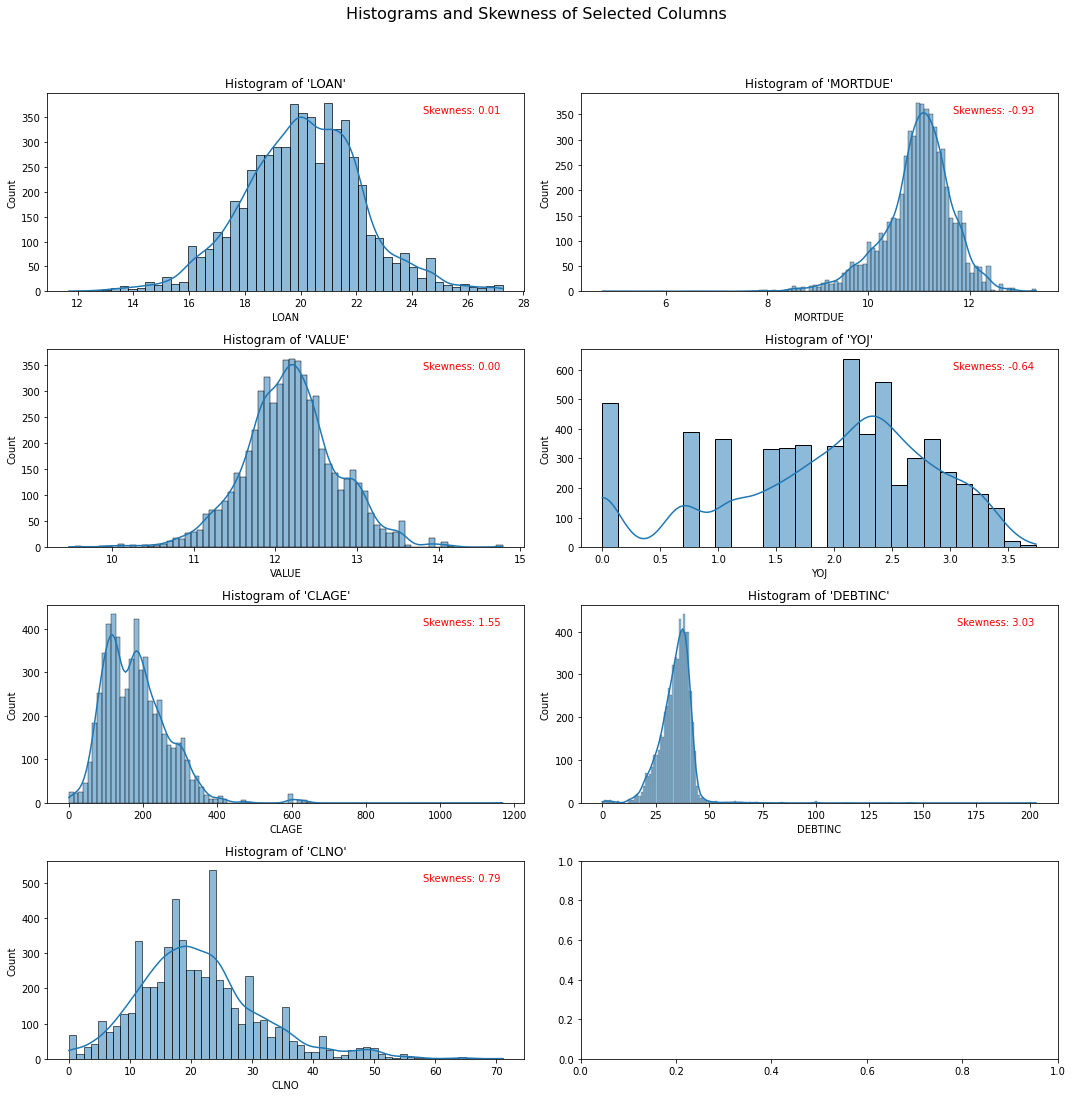

In [54]:
# Select the columns to check for skewness
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC' ,'CLNO']

# Create subplots for histograms
num_columns = len(columns_to_check)
num_rows = (num_columns + 1) // 2  # Calculate the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
fig.suptitle("Histograms and Skewness of Selected Columns", fontsize=16)

for idx, column in enumerate(columns_to_check):
    row_idx = idx // 2
    col_idx = idx % 2

    # Plot histogram
    sns.histplot(data[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(f"Histogram of '{column}'")

    # Calculate skewness
    skew_value = data[column].skew()
    axes[row_idx, col_idx].text(0.95, 0.9, f"Skewness: {skew_value:.2f}", transform=axes[row_idx, col_idx].transAxes,
                                horizontalalignment='right', fontsize=10, color='red')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [55]:
data.shape

(5862, 20)

Plotting Heatmap of correlation after cleaning and transforming the attributes

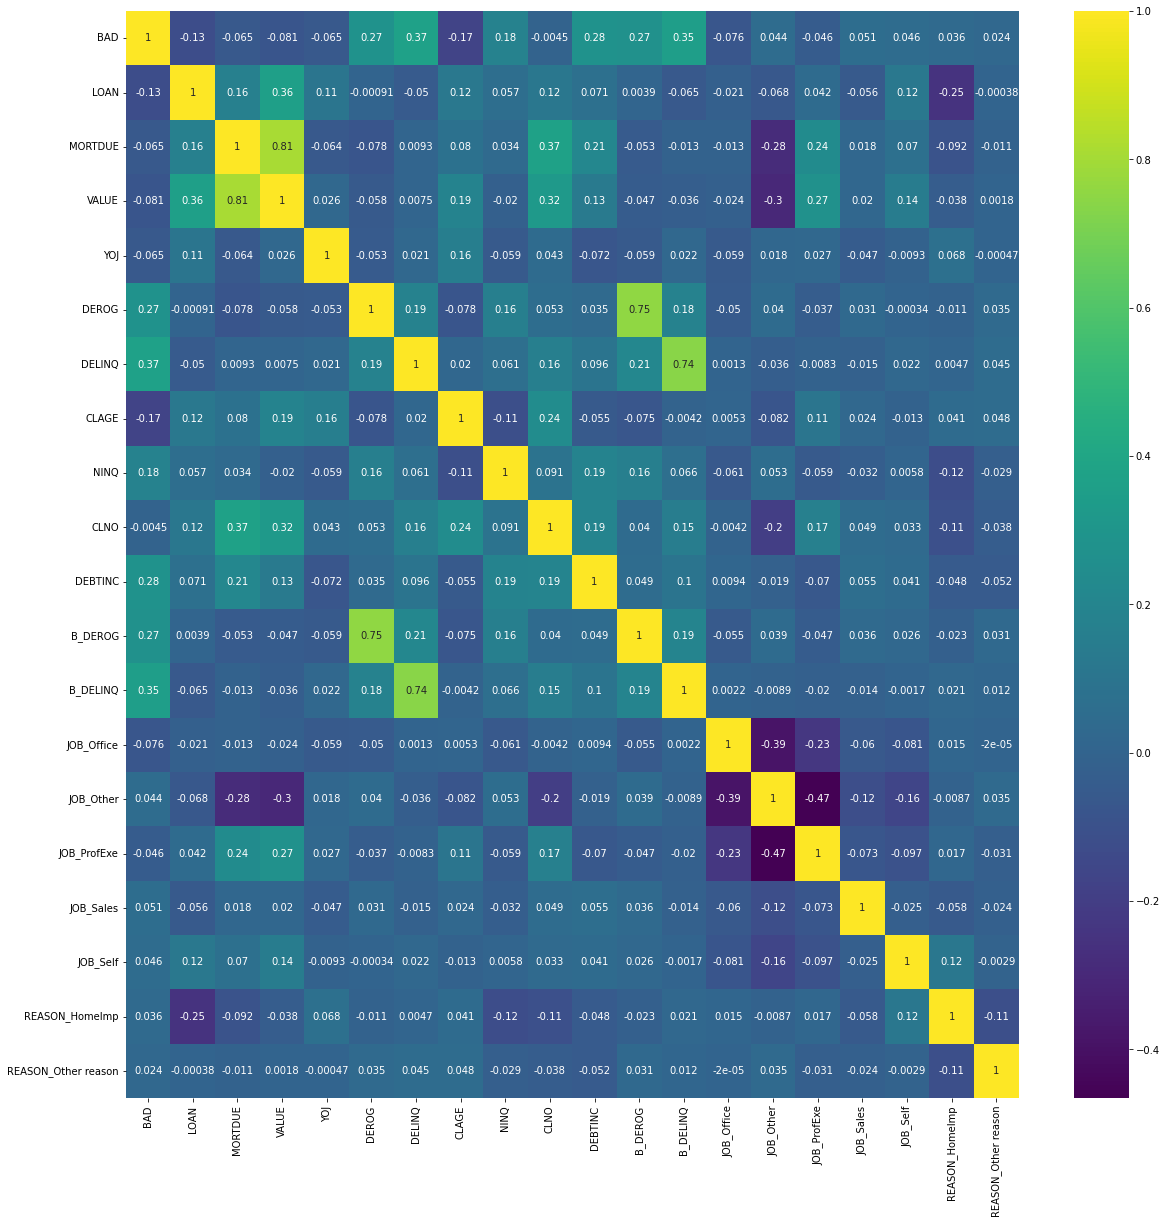

In [56]:

# Create a figure and plot the heatmap
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(data.corr(), annot=True, cmap="viridis")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

* The heatmat shows that features are correlated with each other . "DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN" columns having high correlation

### Feature selection


### Using  Correlation factor for feature selection

In [57]:
# Finding correlation between all the features and the target feature "BAD"

data.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,B_DEROG,B_DELINQ,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,REASON_Other reason
BAD,1.000000,-0.127420,-0.064740,-0.081465,-0.064753,0.273175,0.365342,-0.171478,0.176370,-0.004517,0.281770,0.267870,0.351774,-0.076228,0.044086,-0.046453,0.050501,0.045565,0.036118,0.023916
LOAN,-0.127420,1.000000,0.164486,0.357813,0.106301,-0.000907,-0.049630,0.121403,0.057405,0.115273,0.071068,0.003938,-0.064532,-0.020627,-0.068119,0.042231,-0.055753,0.120027,-0.250114,-0.000377
MORTDUE,-0.064740,0.164486,1.000000,0.807666,-0.063676,-0.078230,0.009338,0.079941,0.033678,0.372755,0.211650,-0.052846,-0.012761,-0.013441,-0.282829,0.237228,0.017854,0.069524,-0.091671,-0.011223
VALUE,-0.081465,0.357813,0.807666,1.000000,0.026135,-0.057877,0.007507,0.192601,-0.020125,0.323678,0.132973,-0.046864,-0.035503,-0.024370,-0.303832,0.268955,0.020305,0.142880,-0.037973,0.001756
YOJ,-0.064753,0.106301,-0.063676,0.026135,1.000000,-0.053341,0.020911,0.156524,-0.059117,0.042923,-0.072162,-0.058901,0.022244,-0.059064,0.017556,0.026541,-0.046969,-0.009276,0.068055,-0.000469
DEROG,0.273175,-0.000907,-0.078230,-0.057877,-0.053341,1.000000,0.185836,-0.077727,0.161885,0.052705,0.035463,0.753986,0.182758,-0.050370,0.040387,-0.037371,0.031361,-0.000336,-0.011340,0.035264
DELINQ,0.365342,-0.049630,0.009338,0.007507,0.020911,0.185836,1.000000,0.019891,0.061058,0.159439,0.096446,0.214916,0.741820,0.001332,-0.035731,-0.008330,-0.015333,0.022135,0.004719,0.045444
CLAGE,-0.171478,0.121403,0.079941,0.192601,0.156524,-0.077727,0.019891,1.000000,-0.112037,0.240960,-0.054813,-0.074956,-0.004155,0.005339,-0.081969,0.105395,0.023843,-0.012759,0.040609,0.048150
NINQ,0.176370,0.057405,0.033678,-0.020125,-0.059117,0.161885,0.061058,-0.112037,1.000000,0.090677,0.192122,0.163511,0.066215,-0.060644,0.052880,-0.059209,-0.032262,0.005798,-0.123118,-0.028621
CLNO,-0.004517,0.115273,0.372755,0.323678,0.042923,0.052705,0.159439,0.240960,0.090677,1.000000,0.194066,0.040016,0.151155,-0.004199,-0.200500,0.165343,0.049422,0.033100,-0.105727,-0.037837


In [58]:
# Gathering the 2 feature sets with high peason correlation value,one with 7 and other with 10 features in it

feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN"]
feat2=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","LOAN","JOB_Office","YOJ","JOB_Sales"]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score :  0.86242183058556
f1 score :  0.7286698078090021
precision score :  0.821794124989598
recall score :  0.691935277061989


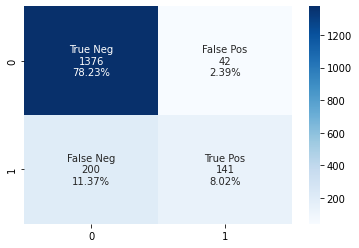

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1418
           1       0.77      0.41      0.54       341

    accuracy                           0.86      1759
   macro avg       0.82      0.69      0.73      1759
weighted avg       0.85      0.86      0.85      1759



In [59]:
# Logistic Regression using above feature set 1

x = data[feat1]
y = data["BAD"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
a1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
p1 = precision_score(y_test, y_pred, average="macro")
r1 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(logreg,x_test,y_test,logreg.predict(x_test))

accuracy score :  0.8504832291074474
f1 score :  0.7682020586468328
precision score :  0.7605860720331563
recall score :  0.7769647887032664



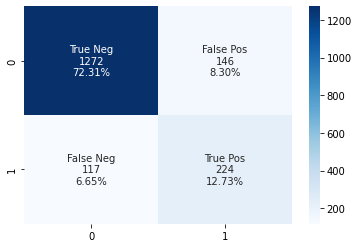

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1418
           1       0.61      0.66      0.63       341

    accuracy                           0.85      1759
   macro avg       0.76      0.78      0.77      1759
weighted avg       0.86      0.85      0.85      1759



In [60]:
# Decision Tree classifier using feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_train,y_train)
y_pred = clf_tree.predict(x_test)
a2 = accuracy_score(y_test,y_pred)
f2 = f1_score(y_test, y_pred, average="macro")
p2 = precision_score(y_test, y_pred, average="macro")
r2 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(clf_tree,x_test,y_test,clf_tree.predict(x_test))

accuracy score :  0.908470722001137
f1 score :  0.8371656839266668
precision score :  0.8859693410416721
recall score :  0.8051352737530453



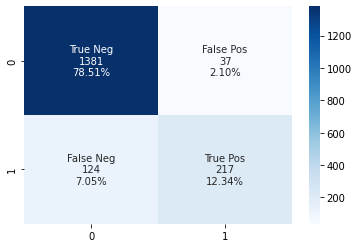

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1418
           1       0.85      0.64      0.73       341

    accuracy                           0.91      1759
   macro avg       0.89      0.81      0.84      1759
weighted avg       0.91      0.91      0.90      1759



In [61]:


# Create a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf_rf.predict(x_test)

# Calculate the accuracy score

a3 = accuracy_score(y_test,y_pred)
f3 = f1_score(y_test, y_pred, average="macro")
p3 = precision_score(y_test, y_pred, average="macro")
r3 = recall_score(y_test, y_pred, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)
print("")
# Computing Confusion matrix for the above algorithm

# Plot non-normalized confusion matrix
model_analysis(clf_rf,x_test,y_test,clf_rf.predict(x_test))

In [62]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random forest'],
    'Feature Selection ' : ['Pearson corr_fact','Pearson corr_fact','Pearson corr_fact'],
    'Accuracy Score': [a1,a2,a3],
    'Recall Score' : [r1,r2,r3],
    'F1 Score' : [f1,f2,f3],
    'Precision Score' : [p1,p2,p3]
})

In [63]:
models

,Model,Feature Selection,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,Pearson corr_fact,0.862422,0.691935,0.728670,0.821794
1,Decision Tree,Pearson corr_fact,0.850483,0.776965,0.768202,0.760586
2,Random forest,Pearson corr_fact,0.908471,0.805135,0.837166,0.885969


In [64]:
pd.pivot_table(models,index = ["Feature Selection ","Model"])

Accuracy Score  F1 Score  \
Feature Selection  Model                                           
Pearson corr_fact  Decision Tree              0.850483  0.768202   
                   Logistic Regression        0.862422  0.728670   
                   Random forest              0.908471  0.837166   

                                        Precision Score  Recall Score  
Feature Selection  Model                                               
Pearson corr_fact  Decision Tree               0.760586      0.776965  
                   Logistic Regression         0.821794      0.691935  
                   Random forest               0.885969      0.805135

### Insights:

- Logistic Regression produced results with a good accuracy but overall performance is not that good.

- The maximum depth of the decision tree is set to 100  hence number of levels is 101 in all cases.And since we did not set the minimum number of observations in the leaf will be 1 since it is classification problem.


# Summary

- Accuracy score of Decision Tree is 0.8453, indicating the effectiveness of this process in enhancing our model's predictive performance.

- Accuracy score of Logistic Regression is 0.8612, indicating the effectiveness of this process in enhancing our model's predictive performance.

- Logistic regression with Pearson correlation-based feature selection achieved higher accuracy, F1 score, precision, and recall compared to the unfiltered logistic regression model.

- Accuracy score of Random forest is 0.9084.The model continues to demonstrate strong predictive performance, showcasing the effectiveness of the selected features in maintaining accuracy while enhancing model efficiency.

- Correlation as a feature selection method improved the performance of the logistic regression and deteriorate the performance of the Decision Tree , Random forest.